In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import utils
df = pd.read_csv('diabetes.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [4]:
bestfeatures = SelectKBest(score_func=chi2,k=8)
fit = bestfeatures.fit(X,y)

In [5]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


<AxesSubplot:xlabel='Specs', ylabel='Score'>

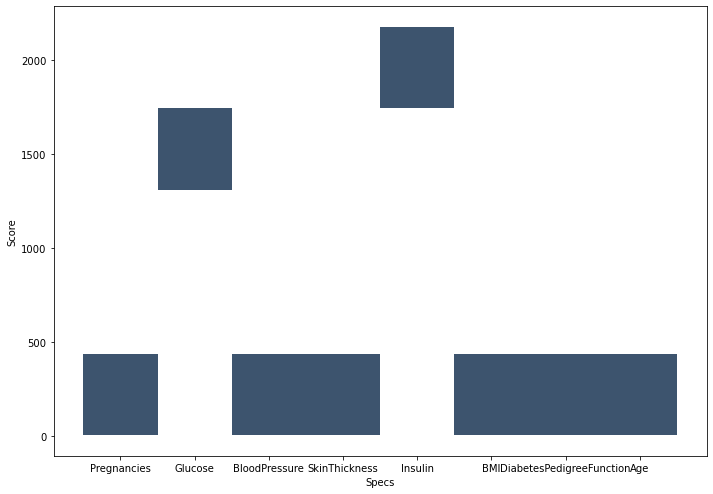

In [7]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.histplot(ax=ax,data=featureScores,x='Specs',y='Score')